## Genus Stuff

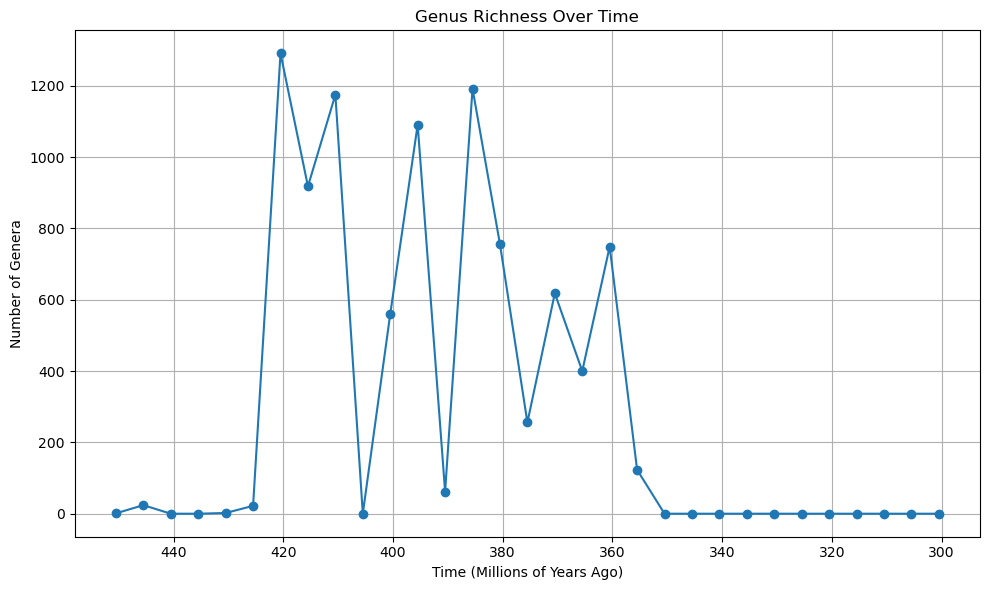

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
genus_data = pd.read_csv("/Users/connormoss/Documents/LASTDANCE/HOLDENER/Genus.csv")

# Preview the data
# print(genus_data.head())

# Drop rows missing taxon name or date info
genus_data = genus_data.dropna(subset=['accepted_name', 'max_ma', 'min_ma'])

# Filter only genus-level records
genus_data = genus_data[genus_data['accepted_rank'] == 'genus']

# Create time bins (e.g., every 5 million years)
bin_size = 5
max_age = int(genus_data['max_ma'].max())
min_age = int(genus_data['min_ma'].min())
bins = list(range(min_age, max_age + bin_size, bin_size))

# Create time_bin column based on max_ma (first appearance)
genus_data['time_bin'] = pd.cut(genus_data['max_ma'], bins=bins, right=False)

# Count unique genera per time bin
biodiversity_g = genus_data.groupby('time_bin')['accepted_name'].nunique().reset_index()
biodiversity_g.columns = ['time_bin', 'genus_count']

# Add midpoint for each bin (for plotting)
biodiversity_g['midpoint'] = biodiversity_g['time_bin'].apply(lambda x: x.left + bin_size / 2)

# Plot the biodiversity curve
plt.figure(figsize=(10, 6))
plt.plot(biodiversity_g['midpoint'], biodiversity_g['genus_count'], marker='o', linestyle='-')
plt.gca().invert_xaxis()  # Time: oldest on left
plt.title("Genus Richness Over Time")
plt.xlabel("Time (Millions of Years Ago)")
plt.ylabel("Number of Genera")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Calculation for Extinction Magnitudes
# Use actual available midpoint values
pre_kellwasser_g = biodiversity_g[biodiversity_g['midpoint'] == 375.5]['genus_count'].iloc[0]
post_kellwasser_g = biodiversity_g[biodiversity_g['midpoint'] == 370.5]['genus_count'].iloc[0]
pre_hangenberg_g = biodiversity_g[biodiversity_g['midpoint'] == 365.5]['genus_count'].iloc[0]
post_hangenberg_g = biodiversity_g[biodiversity_g['midpoint'] == 360.5]['genus_count'].iloc[0]

# Calculate percent genus loss
kellwasser_loss_g = (pre_kellwasser_g - post_kellwasser_g) / pre_kellwasser_g * 100
hangenberg_loss_g = (pre_hangenberg_g - post_hangenberg_g) / pre_hangenberg_g * 100

print(f"Kellwasser Extinction: {kellwasser_loss_g:.2f}% genus loss")
print(f"Hangenberg Extinction: {hangenberg_loss_g:.2f}% genus loss")


Kellwasser Extinction: -141.41% genus loss
Hangenberg Extinction: -87.25% genus loss


## Species Stuff

/var/folders/r0/q_6lx46n6ysf9fjqlmf07_bm0000gn/T/ipykernel_88367/3393085117.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  species_data = pd.read_csv("/Users/connormoss/Documents/LASTDANCE/HOLDENER/Species.csv")


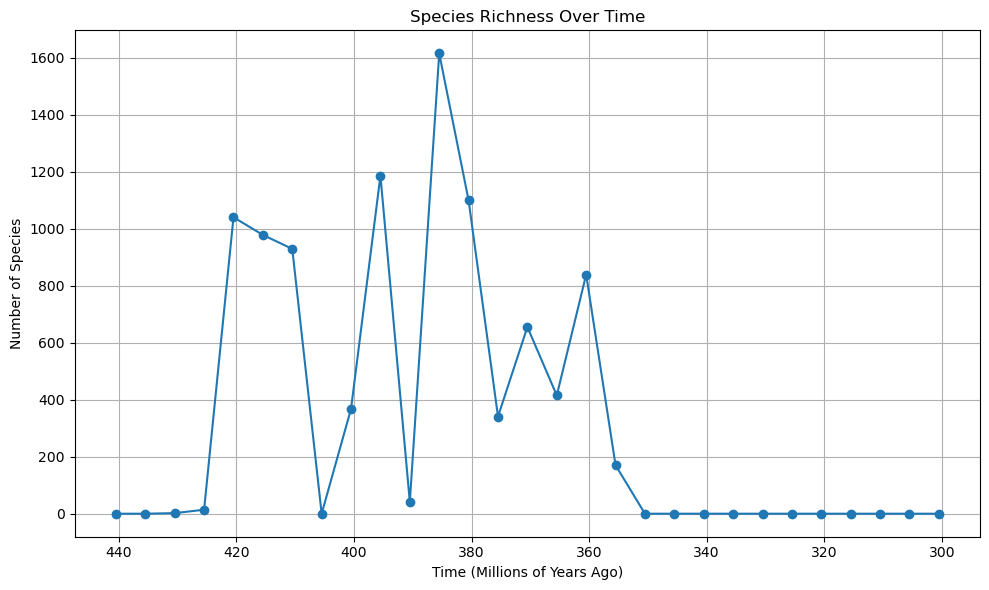

In [15]:
# Load the dataset
species_data = pd.read_csv("/Users/connormoss/Documents/LASTDANCE/HOLDENER/Species.csv")

# Preview the data
# print(species_data.head())

# Drop rows missing taxon name or date info
# species_data = species_data.dropna(subset=['accepted_name', 'max_ma', 'min_ma'])

# Filter only genus-level records
species_data = species_data[species_data['accepted_rank'] == 'species']

# Create time bins (e.g., every 5 million years)
bin_size = 5
max_age = int(species_data['max_ma'].max())
min_age = int(species_data['min_ma'].min())
bins = list(range(min_age, max_age + bin_size, bin_size))

# Create time_bin column based on max_ma (first appearance)
species_data['time_bin'] = pd.cut(species_data['max_ma'], bins=bins, right=False)

# Count unique genera per time bin
biodiversity_s = species_data.groupby('time_bin')['accepted_name'].nunique().reset_index()
biodiversity_s.columns = ['time_bin', 'species_count']

# Add midpoint for each bin (for plotting)
biodiversity_s['midpoint'] = biodiversity_s['time_bin'].apply(lambda x: x.left + bin_size / 2)

# Plot the biodiversity curve
plt.figure(figsize=(10, 6))
plt.plot(biodiversity_s['midpoint'], biodiversity_s['species_count'], marker='o', linestyle='-')
plt.gca().invert_xaxis()  # Time: oldest on left
plt.title("Species Richness Over Time")
plt.xlabel("Time (Millions of Years Ago)")
plt.ylabel("Number of Species")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Calculation for Extinction Magnitudes
# Use actual available midpoint values
pre_kellwasser_s = biodiversity_s[biodiversity_s['midpoint'] == 375.5]['species_count'].iloc[0]
post_kellwasser_s = biodiversity_s[biodiversity_s['midpoint'] == 370.5]['species_count'].iloc[0]
pre_hangenberg_s = biodiversity_s[biodiversity_s['midpoint'] == 365.5]['species_count'].iloc[0]
post_hangenberg_s = biodiversity_s[biodiversity_s['midpoint'] == 360.5]['species_count'].iloc[0]

# Calculate percent genus loss
kellwasser_loss_s = (pre_kellwasser_s - post_kellwasser_s) / pre_kellwasser_s * 100
hangenberg_loss_s = (pre_hangenberg_s - post_hangenberg_s) / pre_hangenberg_s * 100

print(f"Kellwasser Extinction: {kellwasser_loss_s:.2f}% species loss")
print(f"Hangenberg Extinction: {hangenberg_loss_s:.2f}% species loss")


Kellwasser Extinction: -92.08% species loss
Hangenberg Extinction: -102.17% species loss
